In [1]:
##L2 Level 2 Given a data set from UCI repository, implement the 
##Logistic regression algorithm. Estimate the class probabilities for a given 
##test data set. Plot and analyze the decision boundaries.

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
data = pd.read_csv(url, sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
# Define the features and target variables
X = data.drop('quality', axis=1) ##independent variables
y = data['quality'] ## dependent variable

In [5]:
data['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [7]:
# Create the logistic regression model
model = LogisticRegression()
# Train the model on the training data
model.fit(X_train, y_train)
# Predict the target variable for the test data
y_pred = model.predict(X_test)
# Estimate the class probabilities for the test data
probas = model.predict_proba(X_test)
print(probas)

[[6.56094275e-03 5.13397589e-03 1.57290437e-01 ... 2.22603067e-01
  4.47574008e-02 1.16088676e-03]
 [2.88932509e-03 1.54392828e-02 7.31897057e-02 ... 3.69900466e-01
  3.87504184e-02 1.20411877e-03]
 [3.10954071e-03 2.68482713e-02 1.75970231e-01 ... 2.44565473e-01
  3.51007678e-02 1.43800458e-03]
 ...
 [1.95111964e-03 1.91795504e-02 3.10606642e-01 ... 1.36821325e-01
  2.84953445e-02 5.48164680e-04]
 [6.41137401e-04 5.80279701e-02 5.02126505e-01 ... 7.00610227e-02
  1.50932042e-02 2.81564395e-04]
 [1.58404996e-03 8.10820249e-02 3.78711867e-01 ... 1.18690168e-01
  2.75177307e-02 5.22533000e-04]]


C:\Users\wasee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
# Print the accuracy score for the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.45918367346938777


C:\Users\wasee\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\wasee\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\wasee\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\wasee\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\wasee\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\wasee\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X d

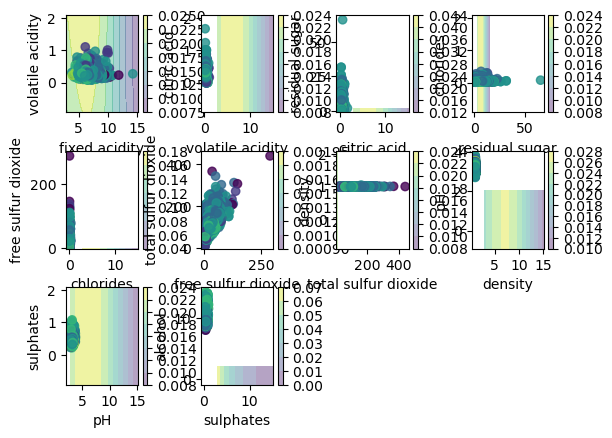

In [9]:
# Create a meshgrid for all 11 features
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1 
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
for i in range(2, 12):
    plt.subplot(3, 4, i-1)
    plt.subplots_adjust(wspace=0.5, hspace=0.4)

    X_plot = np.zeros((xx.shape[0] * xx.shape[1], 11))
    X_plot[:, 0] = xx.ravel()
    X_plot[:, 1] = yy.ravel()

    for j in range(2, 12):
        if i != j:
            X_plot[:, j-1] = X[X.columns[j-1]].mean()

    Z = model.predict_proba(X_plot)[:, 1]
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundaries as a contour plot
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.colorbar()

    # Plot the data points on top of the decision boundaries
    plt.scatter(X.iloc[:, i-2], X.iloc[:, i-1], c=y, alpha=0.8)
    plt.xlabel(X.columns[i-2])
    plt.ylabel(X.columns[i-1])

plt.show()

In [10]:
## Using 2 variables winequality-red.csv

In [11]:
# Load winequality dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [12]:
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [13]:
# Split data into training and testing sets
X = df.drop(columns=['fixed acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates','quality' ])
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Train logistic regression model
lr = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
# Print classification report
from sklearn.metrics import classification_report
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.59      0.78      0.67       130
           6       0.52      0.50      0.51       132
           7       0.37      0.17      0.23        42
           8       0.00      0.00      0.00         5

    accuracy                           0.55       320
   macro avg       0.25      0.24      0.24       320
weighted avg       0.50      0.55      0.51       320



C:\Users\wasee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wasee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wasee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\wasee\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


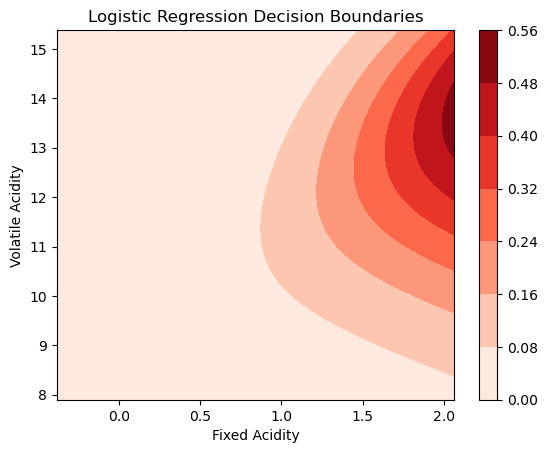

In [17]:
# Plot decision boundaries
n_classes = len(np.unique(y_train))
plot_colors = "ryb"
plot_step = 0.02
x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
y_min, y_max = X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Reds)
plt.colorbar(cs)

plt.xlabel("Fixed Acidity")
plt.ylabel("Volatile Acidity")
plt.title("Logistic Regression Decision Boundaries")
plt.show()